In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings("ignore")

# Load the dataset
dp = pd.read_csv("Data/T1.csv")
dp.describe()
# df.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [2]:
df = dp[:5000]

In [3]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%d %m %Y %H:%M")
df['Month'] = df['Date/Time'].dt.month
df['Week'] = df['Date/Time'].dt.isocalendar().week
df['day'] = df['Date/Time'].dt.day
df['Hour'] = df['Date/Time'].dt.hour
df['Min'] = df['Date/Time'].dt.minute

df.head(4)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,Week,day,Hour,Min
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,1,1,0,30


In [56]:
# df.drop(columns=['Date/Time'])
# df.head()

In [57]:
# import pandas as pd
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import StandardScaler

# # Load your dataset
# # data = pd.read_csv("wind_turbine_data.csv")

# # Separate timestamp column if needed
# timestamps = df['Date']  # Assuming your timestamp column is named 'Date'
# data = df.drop(columns=['Date'])

# # Optional: Scale the data before imputation (especially useful if features have different scales)
# scaler = StandardScaler()
# data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# # Initialize and apply KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# data_imputed = imputer.fit_transform(data_scaled)  # Returns a NumPy array

# # Convert back to DataFrame and revert scaling if needed
# data_imputed = pd.DataFrame(data_imputed, columns=data.columns)
# data_imputed = pd.DataFrame(scaler.inverse_transform(data_imputed), columns=data.columns)

# # Reattach timestamp column
# data_imputed['Date'] = timestamps


In [105]:
All_data = df.drop(columns=['Date/Time'])
All_data

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,Week,day,Hour,Min
0,380.047791,5.311336,416.328908,259.994904,1,1,1,0,0
1,453.769196,5.672167,519.917511,268.641113,1,1,1,0,10
2,306.376587,5.216037,390.900016,272.564789,1,1,1,0,20
3,419.645905,5.659674,516.127569,271.258087,1,1,1,0,30
4,380.650696,5.577941,491.702972,265.674286,1,1,1,0,40
...,...,...,...,...,...,...,...,...,...
4995,1898.718018,8.534276,1849.172137,211.841400,2,6,9,4,20
4996,2078.054932,9.003153,2146.023619,220.823105,2,6,9,4,30
4997,1984.782959,8.976952,2129.143232,218.746307,2,6,9,4,40
4998,1713.978027,8.520245,1840.492316,212.174805,2,6,9,4,50


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler and fit to the dataset
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df.drop(columns=['Date/Time']))


In [7]:
# Define features and target
target_column = 'LV ActivePower (kW)'  # Assuming 'Power' is the column to predict
target = data_scaled[:, df.columns.get_loc(target_column)]
features = np.delete(data_scaled, df.columns.get_loc(target_column), axis=1)
target.shape

(5000,)

In [8]:
# # Define features and target
# target_column = 'LV ActivePower (kW)'  # Assuming 'Power' is the column to predict
# # target = All_data[:, df.columns.get_loc(target_column)]
# features = np.delete(All_data, df.columns.get_loc(target_column), axis=1)
# target.shape

In [9]:
ll=df.columns.get_loc(target_column)
ll

1

In [10]:
features.shape

(5000, 8)

In [82]:
timesteps = 8  # Number of past time steps to include

X, y = [], []
for i in range(timesteps, len(features)):
    X.append(features[i - timesteps:i])
    y.append(target[i])

X, y = np.array(X), np.array(y)


In [83]:
train_size = int(0.8 * len(X))
# train_size = 
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


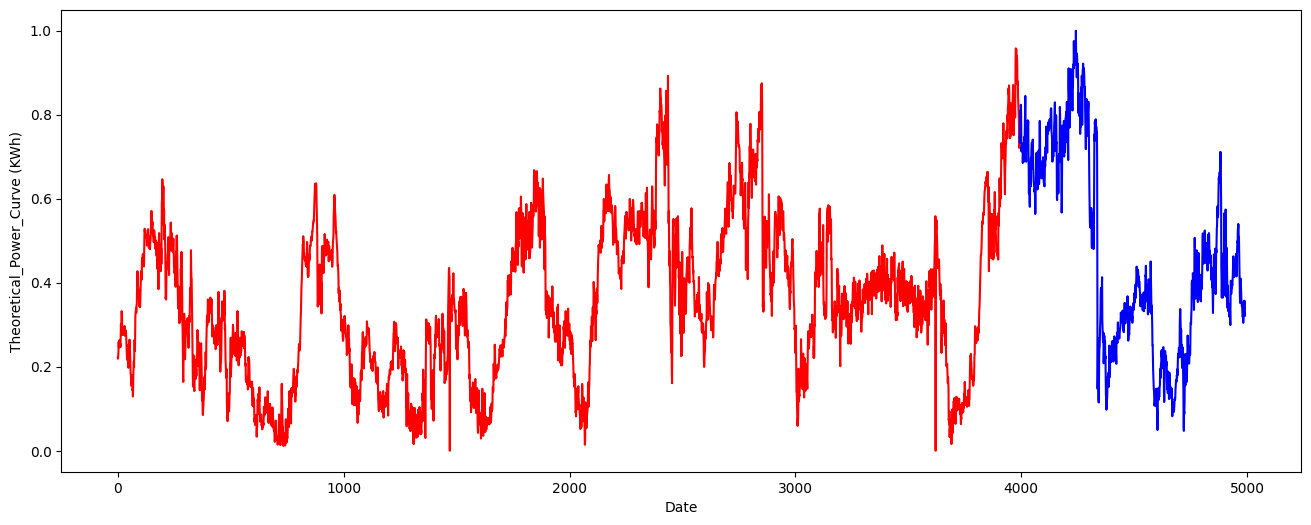

In [84]:
from matplotlib import pyplot as plt

test_x_range=np.arange(train_size ,len(X),1)
#test_x_range is an array of values between 1000-1208
plt.figure(figsize=(16,6))
plt.plot(y_train,'r',label='train')
plt.plot(test_x_range,y_test,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Theoretical_Power_Curve (KWh)')
plt.show()

In [85]:
import tensorflow.keras.backend as K

def r_squared(y_true, y_pred):
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam,SGD

# # Define the LSTM model architecture
model = Sequential()
model.add(LSTM(48, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

model.add(LSTM(48, return_sequences=False))
model.add(Dropout(0.2))

# model.add(Dense(25, activation='relu'))
model.add(Dense(1))  # Output layer for regression (predicting power output)

opt = Adam(0.0001, clipnorm=1.0)
# # Compile the model
model.compile(optimizer=opt, loss='mean_squared_error',metrics=['mae','mse',r_squared])
# model.summary()


In [87]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

# # Define the LSTM model architecture
# model = Sequential()
# model.add(LSTM(96, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))  # Dropout layer to prevent overfitting

# model.add(LSTM(units=96,return_sequences=True))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))

# model.add(LSTM(units=96,return_sequences=True))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# model.add(LSTM(units=96,return_sequences=False))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# # model.add(Dense(64, activation='relu'))
# # model.add(Dropout(0.2))
# # model.add(Dense(32, activation='sigmoid'))
# # Output layer
# model.add(Dense(1, activation='linear'))

# model.compile(loss='mse',optimizer='adam',metrics=['mae','mse',r_squared])
# # model.summary()


In [88]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to stop training when a monitored metric has stopped improving
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.1,)           
                    # validation_data=(X_test, y_test),) 
                    # callbacks=[early_stop])


Epoch 1/100
113/113 [==============================] - 4s 16ms/step - loss: 0.0251 - mae: 0.1181 - mse: 0.0251 - r_squared: 0.1080 - val_loss: 0.0734 - val_mae: 0.2458 - val_mse: 0.0734 - val_r_squared: -33.4521
Epoch 2/100
113/113 [==============================] - 1s 9ms/step - loss: 0.0091 - mae: 0.0737 - mse: 0.0091 - r_squared: 0.6762 - val_loss: 0.0436 - val_mae: 0.1737 - val_mse: 0.0436 - val_r_squared: -15.8801
Epoch 3/100
113/113 [==============================] - 1s 9ms/step - loss: 0.0073 - mae: 0.0648 - mse: 0.0073 - r_squared: 0.7400 - val_loss: 0.0329 - val_mae: 0.1445 - val_mse: 0.0329 - val_r_squared: -10.8260
Epoch 4/100
113/113 [==============================] - 1s 9ms/step - loss: 0.0065 - mae: 0.0620 - mse: 0.0065 - r_squared: 0.7657 - val_loss: 0.0320 - val_mae: 0.1374 - val_mse: 0.0320 - val_r_squared: -9.7954
Epoch 5/100
113/113 [==============================] - 1s 9ms/step - loss: 0.0060 - mae: 0.0597 - mse: 0.0060 - r_squared: 0.7848 - val_loss: 0.0278 - val_m

In [89]:
# # Predict on test set
# predictions = model.predict(X_test)

# # Rescale the predictions and actual values to their original scale if needed
# y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
# predictions_rescaled = scaler.inverse_transform(predictions)

# # Calculate error metrics
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
# print("Mean Squared Error:", mse)


In [90]:
from sklearn.metrics import r2_score

result=model.predict(X_test)
# result
r2=r2_score(y_test,result)
print('r2 score:',r2)

#0.8326071961232782

r2 score: 0.7952724790440477


In [1]:
# from sklearn.metrics import r2_score
# tr_y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
# result=model.predict(X_test)
# tr_result = scaler.inverse_transform(result)
# r2=r2_score(tr_y_test,tr_result)
# print('r2 score:',r2)

# #0.8326071961232782

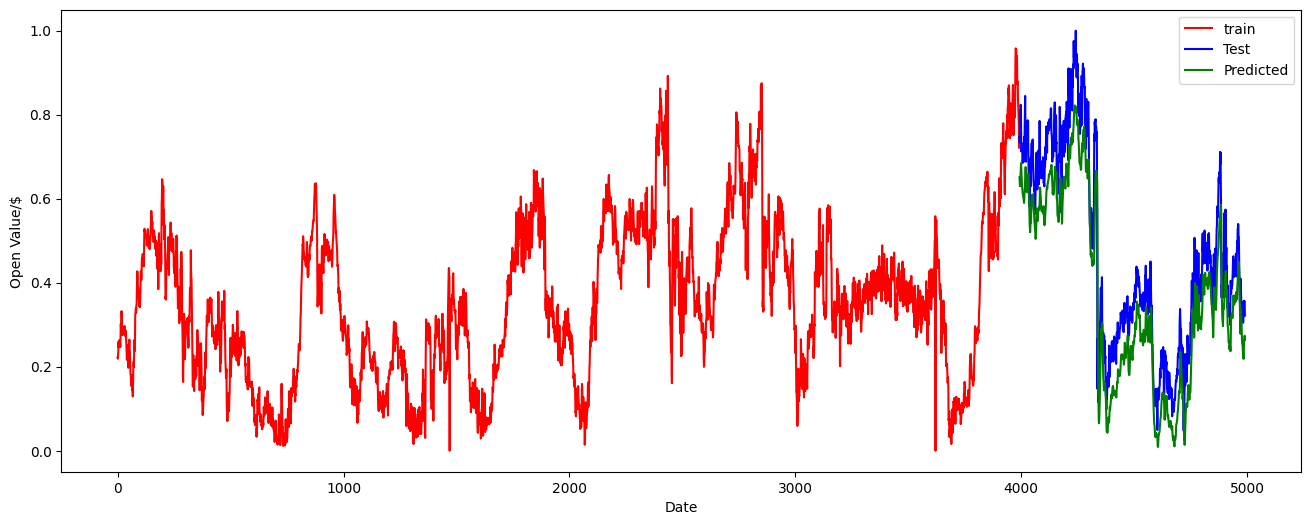

In [91]:
test_x_range=np.arange(train_size ,len(X),1)
plt.figure(figsize=(16,6))
plt.plot(y_train,'r',label='train')
plt.plot(test_x_range,y_test,'b',label='Test')
plt.plot(test_x_range,result,'g',label='Predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

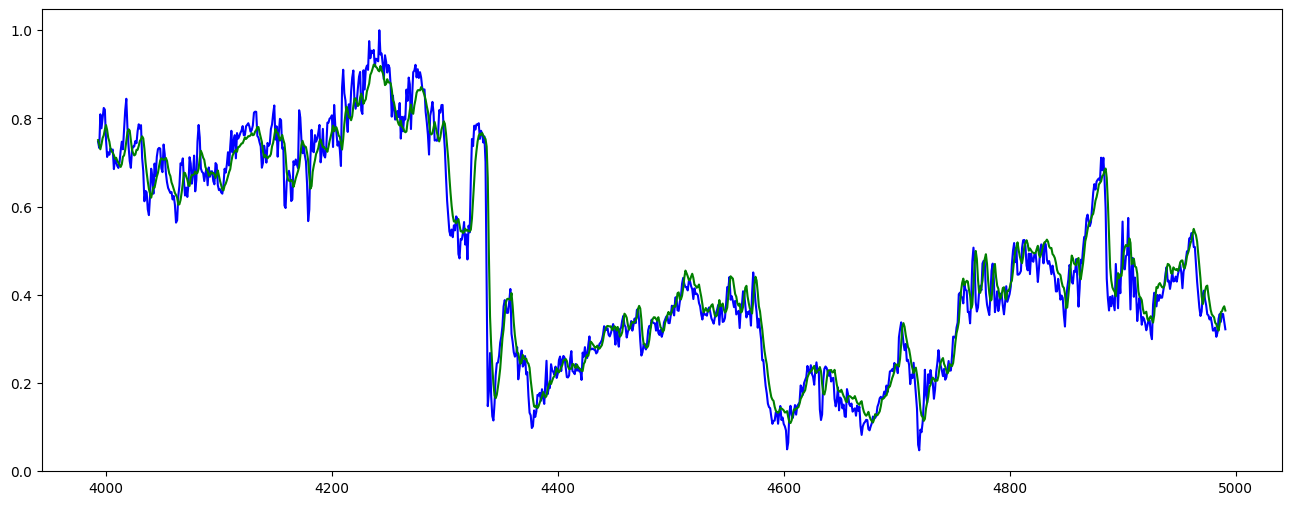

In [94]:
test_x_range=np.arange(train_size ,len(X),1)
plt.figure(figsize=(16,6))
# plt.plot(y_train,'r',label='train')
plt.plot(test_x_range,y_test,'b',label='Test')
plt.plot(test_x_range,result+0.1,'g',label='Predicted')

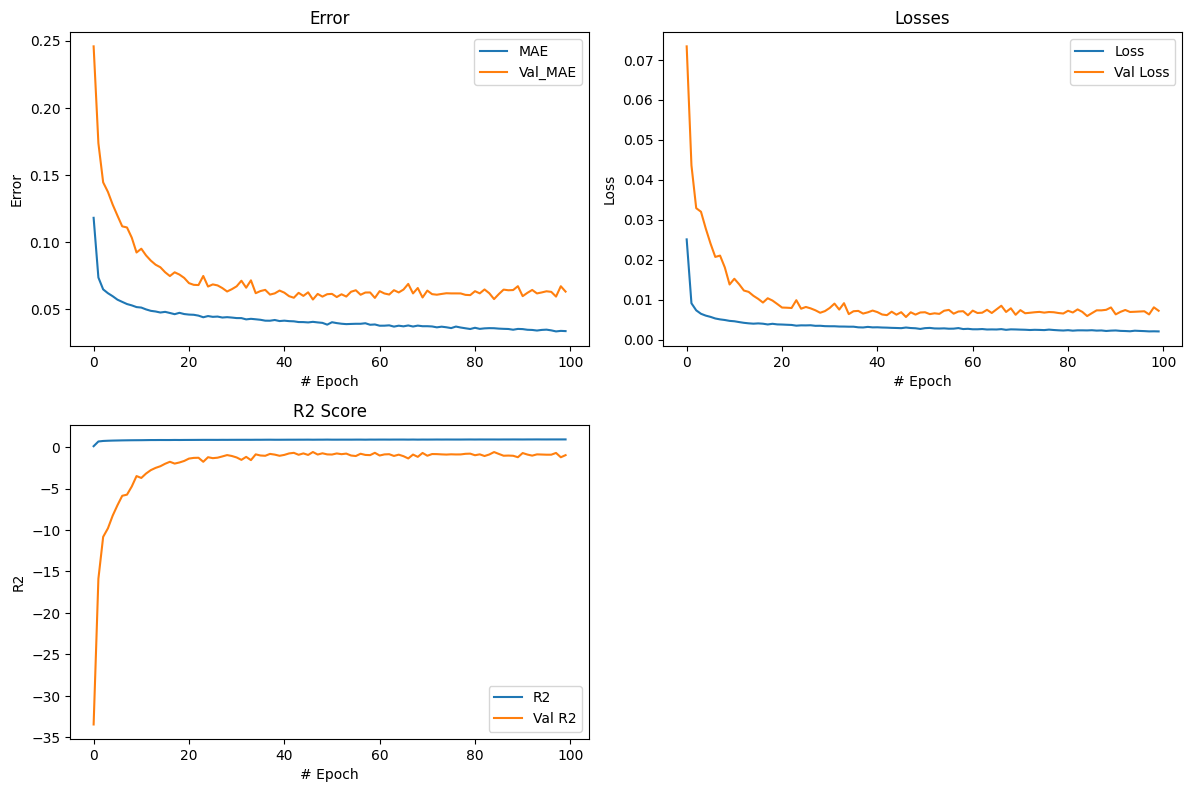

In [92]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 3)
plt.plot(history.history["r_squared"],label='R2')
plt.plot(history.history["val_r_squared"],label='Val R2')
plt.legend()
plt.ylabel('R2')
plt.xlabel('# Epoch')
plt.title('R2 Score')

plt.subplot(2, 2, 1)
plt.plot(history.history['mae'],label='MAE')
plt.plot(history.history['val_mae'],label='Val_MAE')
plt.legend()
plt.ylabel('Error')
plt.xlabel('# Epoch')
plt.title('Error')

plt.subplot(2, 2, 2)
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.legend()
plt.xlabel('# Epoch')
plt.ylabel('Loss')
plt.title('Losses')

plt.tight_layout(pad=1)
# plt.savefig("Results.png")
# plt.show()

# x = model.evaluate(test_data, test_target)
# print("\n",round(x[1]*100,2),"%")